![This is an image](https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview.png)
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: SARAVANAVEL***


# ***ADVANCED LEVEL TASK***
### Task 7 -Develop A Neural Network That Can Read Handwriting
Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

## Importing Packages

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

C:\Users\SaravanaVel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

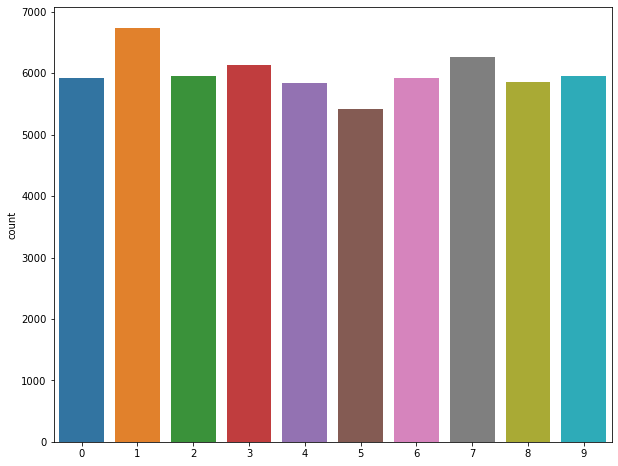

In [3]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

## Dataset properties

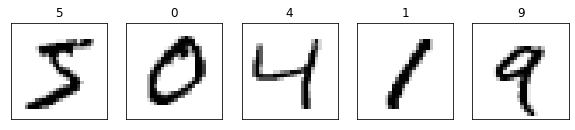

In [4]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

## Pre-processing the data

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## Creating the model

### Model Architecture

We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

- Conv2D - for the convolution layers
- Dropout - to prevent overfitting
- Dense - a fully connected layer 
- Softmax activation - This is used to convert all predictions into probability

The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

**CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [9]:

model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        1

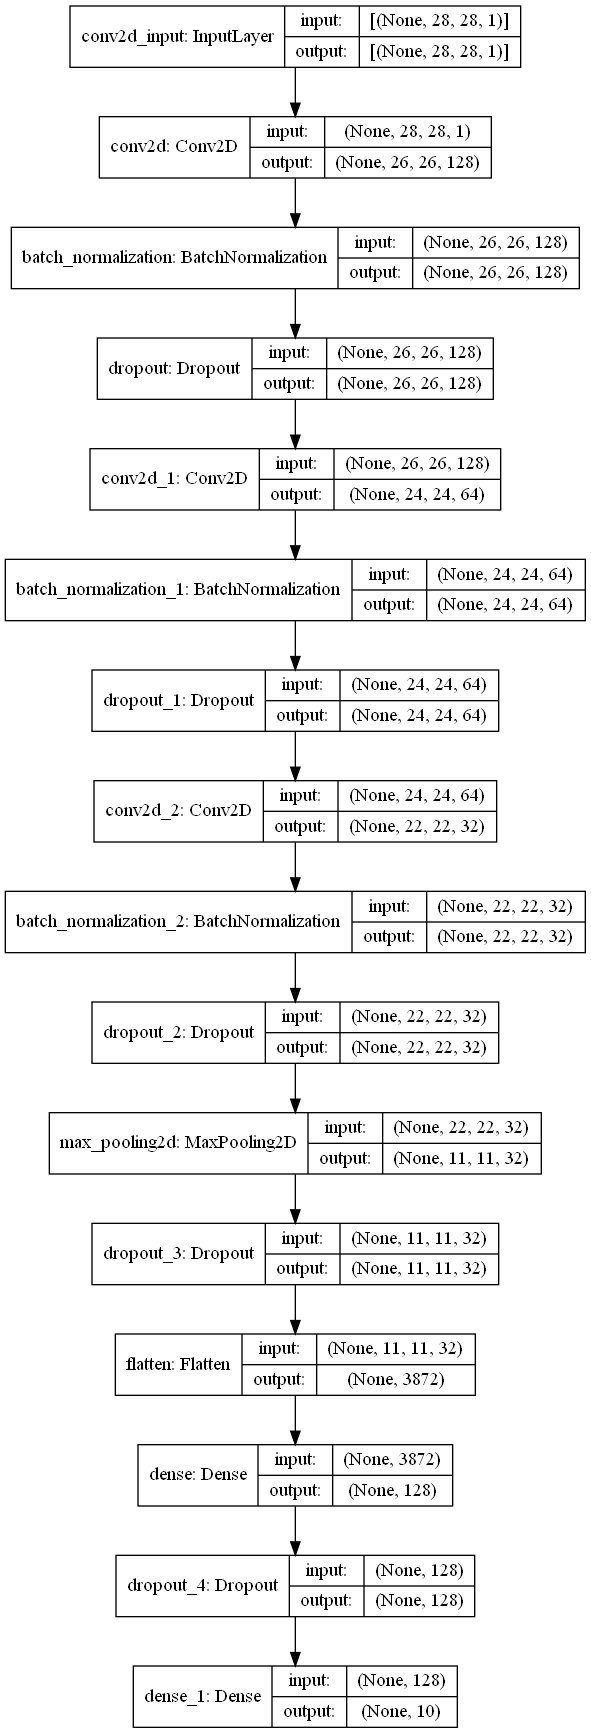

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

## Train the model


In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 338s 200ms/step - loss: 0.2597 - accuracy: 0.9229 - val_loss: 0.0940 - val_accuracy: 0.9840
Epoch 2/10
1688/1688 [==============================] - 346s 205ms/step - loss: 0.1127 - accuracy: 0.9676 - val_loss: 0.1048 - val_accuracy: 0.9785
Epoch 3/10
1688/1688 [==============================] - 406s 241ms/step - loss: 0.0884 - accuracy: 0.9745 - val_loss: 0.1048 - val_accuracy: 0.9842
Epoch 4/10
1688/1688 [==============================] - 415s 246ms/step - loss: 0.0749 - accuracy: 0.9780 - val_loss: 0.1036 - val_accuracy: 0.9840
Epoch 5/10
1688/1688 [==============================] - 415s 246ms/step - loss: 0.0693 - accuracy: 0.9802 - val_loss: 0.1150 - val_accuracy: 0.9822
Epoch 6/10
1688/1688 [==============================] - 414s 245ms/step - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.1211 - val_accuracy: 0.9853
Epoch 7/10
1688/1688 [==============================] - 365s 216ms/step - loss: 0.0512 - accuracy: 0.9848 - val_

In [13]:
model.save('project.h5')


In [14]:
from tensorflow.keras.models import load_model
model = load_model('project.h5')

## Evaluate the model

In [15]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 7s 23ms/step - loss: 3.8469 - accuracy: 0.9886
Test Loss 3.8468596935272217
Test Accuracy 0.9886000156402588


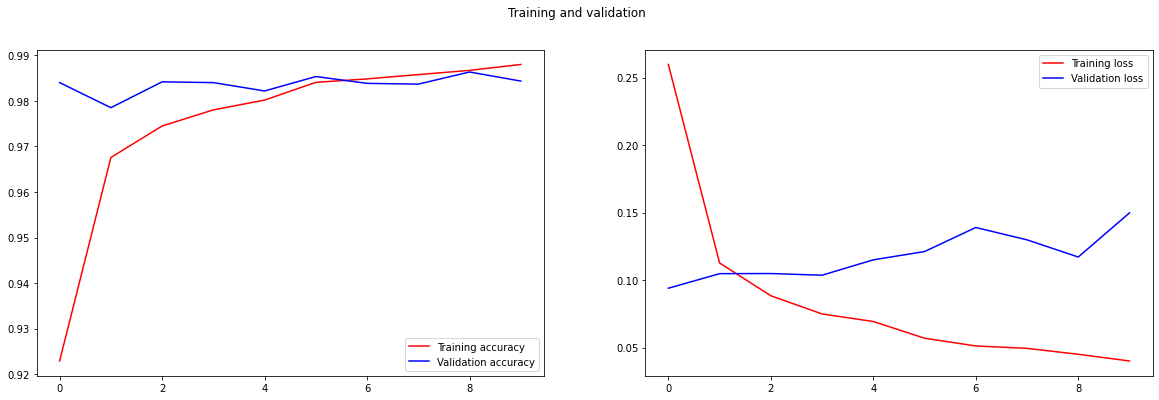

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

## Confusion Matrix

In [17]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    2,    0,    0,    0,    1,    0,    3,    1],
       [   1, 1125,    2,    1,    0,    1,    3,    0,    2,    0],
       [   0,    0, 1026,    0,    0,    0,    0,    3,    3,    0],
       [   0,    0,    2, 1003,    0,    1,    0,    0,    4,    0],
       [   0,    0,    0,    0,  967,    0,    2,    0,    3,   10],
       [   0,    0,    0,   11,    0,  866,    2,    1,   11,    1],
       [   2,    1,    0,    1,    2,    1,  945,    0,    6,    0],
       [   0,    1,    8,    0,    0,    0,    0, 1014,    1,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    1,    2,    3,    3,    0,    0,    7,  993]])>

Text(69.0, 0.5, 'Truth')

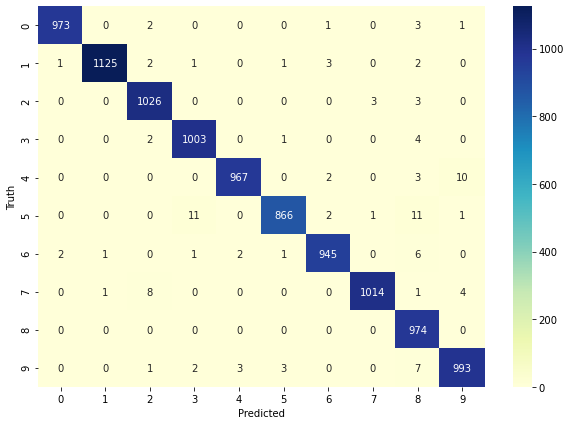

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing the Model

Predicted Value:  7
Successful prediction


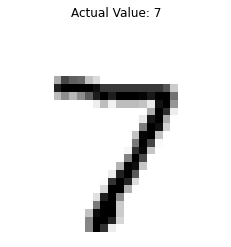

In [19]:
plt.imshow(x_test[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[0]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(y_test[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  2
Successful prediction


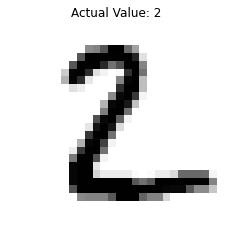

In [20]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

# THANK YOU!!